In [178]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt 

In [10]:
abs = pd.read_excel('G:/SupervsedLearning/Absenteeism_at_work.xls')

In [11]:
abs.iloc[1:10,]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239554,...,0,3,1,0,0,1,88,172,29,8


In [87]:
abs.columns = abs.columns.str.replace(' ', '_')

In [53]:
abs.columns

Index(['ID', 'Reason_for_absence', 'Month_of_absence', 'Day_of_the_week',
       'Seasons', 'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [33]:
# There are 36 EMployees in the data set
abs.ID.nunique()

36

In [34]:
np.sort(abs.ID.unique(), axis = 0)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36], dtype=int64)

In [55]:
abs[abs['Reason_for_absence'] == 0].ID.nunique()

#employees displinary failure is yes - 23

23

In [56]:
np.sort(abs[abs['Reason_for_absence'] == 0].ID.unique(),axis =0)

#employee IDs whose displinary failure is yes

array([ 1,  2,  3,  4,  5,  7,  8, 11, 13, 15, 18, 19, 20, 21, 23, 24, 28,
       29, 30, 31, 33, 35, 36], dtype=int64)

In [59]:
abs_noreason = abs[abs['Reason_for_absence'] == 0]

when reason for absence is 0 i chekced absentism hours which is 0 in most cases and disciplinary failure is yes

In [82]:
abs_noreason_v1 = abs_noreason[['ID','Service_time','Hit_target','Disciplinary_failure','Work_load_Average/day_']].sort_values(['ID','Hit_target','Work_load_Average/day_'], ascending = [True,True,False])
abs_noreason_v1

,ID,Service_time,Hit_target,Disciplinary_failure,Work_load_Average/day_
405,1,14,98,1,244387
203,2,12,96,1,326452
714,2,12,96,1,275089
446,3,18,95,1,253957
737,4,13,95,0,271219
273,5,13,81,1,294217
285,5,13,81,1,294217
300,5,13,88,1,265017
303,5,13,88,1,265017
551,5,13,93,1,268519


In [84]:
abs_noreason_v1.Hit_target.mean()

92.44186046511628

In [85]:
abs_noreason_v1.Service_time.mean()

12.627906976744185

In [92]:
abs['Work_load_Average/day_'].describe()


count       740.000000
mean     271490.235135
std       39058.116188
min      205917.000000
25%      244387.000000
50%      264249.000000
75%      294217.000000
max      378884.000000
Name: Work_load_Average/day_, dtype: float64

In [94]:
abs_noreason_v1['Work_load_Average/day_'].describe()

count        43.000000
mean     275880.023256
std       38664.355681
min      237656.000000
25%      244387.000000
50%      268519.000000
75%      284031.000000
max      378884.000000
Name: Work_load_Average/day_, dtype: float64

Employees who received disciplinary failure are the most serviced employees (avg of 12.5 years) with avg Hit target of 92% whose work load is high compared to people who didnt receive the disciplinary failure  

In [176]:
abs_reason.dtypes

ID                                 int64
Reason_for_absence                 int64
Month_of_absence                   int64
Day_of_the_week                    int64
Seasons                            int64
Transportation_expense             int64
Distance_from_Residence_to_Work    int64
Service_time                       int64
Age                                int64
Work_load_Average/day_             int64
Hit_target                         int64
Disciplinary_failure               int64
Education                          int64
Son                                int64
Social_drinker                     int64
Social_smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body_mass_index                    int64
Absenteeism_time_in_hours          int64
dtype: object

In [98]:
abs_reason = abs[abs.Reason_for_absence != 0]
abs_reason.

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239554,...,0,3,1,0,0,1,88,172,29,8
10,20,1,7,2,1,260,50,11,36,239554,...,0,1,4,1,0,0,65,168,23,8


In [101]:
abs_reason[abs_reason['Absenteeism_time_in_hours'] == 0]
#I see a Reason for absence with Absentism hours being 0

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
134,34,27,1,2,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,0


In [104]:
abs_reason[abs_reason.duplicated() == True].sort_values('ID')

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
16,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
610,3,27,2,2,2,179,51,18,38,264249,...,0,1,0,1,0,0,89,170,31,2
615,3,27,2,4,2,179,51,18,38,264249,...,0,1,0,1,0,0,89,170,31,2
616,3,27,2,5,2,179,51,18,38,264249,...,0,1,0,1,0,0,89,170,31,2
389,3,27,2,6,2,179,51,18,38,251818,...,0,1,0,1,0,0,89,170,31,3
388,3,27,2,4,2,179,51,18,38,251818,...,0,1,0,1,0,0,89,170,31,3
386,3,27,2,6,2,179,51,18,38,251818,...,0,1,0,1,0,0,89,170,31,3
385,3,27,2,4,2,179,51,18,38,251818,...,0,1,0,1,0,0,89,170,31,3
376,3,27,2,4,2,179,51,18,38,251818,...,0,1,0,1,0,0,89,170,31,3
605,3,27,2,4,2,179,51,18,38,264249,...,0,1,0,1,0,0,89,170,31,2


34 duplicate rows were identified from dataframe

In [108]:
#Removing the duplicates

abs_reason = abs_reason.drop_duplicates()

In [109]:
#checking for missing values 
abs_reason.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 663 entries, 0 to 736
Data columns (total 21 columns):
ID                                 663 non-null int64
Reason_for_absence                 663 non-null int64
Month_of_absence                   663 non-null int64
Day_of_the_week                    663 non-null int64
Seasons                            663 non-null int64
Transportation_expense             663 non-null int64
Distance_from_Residence_to_Work    663 non-null int64
Service_time                       663 non-null int64
Age                                663 non-null int64
Work_load_Average/day_             663 non-null int64
Hit_target                         663 non-null int64
Disciplinary_failure               663 non-null int64
Education                          663 non-null int64
Son                                663 non-null int64
Social_drinker                     663 non-null int64
Social_smoker                      663 non-null int64
Pet                            

In [110]:
abs_reason.describe()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,...,663.0,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,18.202112,20.107089,6.351433,3.892911,2.509804,221.444947,29.479638,12.487179,36.276018,271844.174962,...,0.0,1.303167,1.042232,0.558069,0.069382,0.751131,78.711916,172.226244,26.526395,7.606335
std,10.881323,7.209154,3.405859,1.436152,1.115455,66.223778,14.731611,4.425216,6.463293,39525.830481,...,0.0,0.684378,1.105341,0.496991,0.254294,1.296018,12.691076,6.216641,4.150727,13.916901
min,1.000000,1.000000,1.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,10.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,2.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.0,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,4.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.0,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,0.0,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


No missing values were found in data.

In [149]:
#rcounts.loc[rcounts.groupby(["ID", "Reason_for_absence"])["count"].idxmax()] 
rcounts = abs_reason.groupby(['ID','Reason_for_absence']).agg({'Reason_for_absence' : 'size'}).rename(columns = {'Reason_for_absence' : 'count'})
rcounts

count
ID Reason_for_absence       
1  1                       1
   7                       1
   11                      1
   13                      3
   14                      1
   18                      1
   19                      1
   21                      1
   22                      4
   23                      4
   25                      2
   26                      2
2  18                      2
   23                      1
   28                      1
3  5                       1
   6                       1
   10                      2
   11                      7
   12                      1
   13                     10
   18                      2
   21                      2
   23                     18
   25                      2
   26                      1
   27                     24
   28                     25
5  13                      2
   19                      1
...                      ...
33 10                      1
   13                      1
   14                      3
   19                      1
   23                     11
   25                      2
   26                      1
   28                      2
34 5                       1
   7                       1
   8                       3
   9                       1
   10                      4
   11                      3
   13                      1
   18                      1
   19                      4
   23                      8
   25                      2
   26                      3
   27                      8
   28                     10
36 1                       1
   5                       1
   13                      6
   14                      2
   19                      2
   23                     11
   26                      1
   28                      4

[228 rows x 1 columns]

In [175]:
rcountsmax = rcounts.groupby(['ID','Reason_for_absence'])['count'].transform(max) == rcounts['count']
rcounts[rcountsmax].sort_values('count',ascending = False).to_excel('G:/SupervsedLearning/rcountsmax.xlsx')
rcounts[rcountsmax].sort_values('count',ascending = False)

count
ID Reason_for_absence       
28 23                     31
3  28                     25
   27                     24
20 28                     19
3  23                     18
15 28                     15
36 23                     11
22 27                     11
33 23                     11
28 28                     10
22 23                     10
3  13                     10
22 13                     10
10 22                     10
34 28                     10
15 23                     10
5  26                      9
24 28                      8
34 23                      8
   27                      8
11 19                      8
3  11                      7
14 23                      7
28 25                      6
14 28                      6
11 22                      6
   26                      6
17 25                      6
36 13                      6
11 23                      5
...                      ...
26 15                      1
20 15                      1
26 14                      1
15 12                      1
25 28                      1
9  1                       1
25 23                      1
   16                      1
   11                      1
   10                      1
   1                       1
9  12                      1
24 23                      1
10 8                       1
11 7                       1
10 10                      1
24 4                       1
   1                       1
10 13                      1
23 19                      1
   1                       1
10 14                      1
22 25                      1
   21                      1
10 25                      1
   28                      1
11 6                       1
22 7                       1
20 22                      1
1  1                       1

[228 rows x 1 columns]

In [124]:
abs_reason.groupby(['ID']).agg({'Absenteeism_time_in_hours':abs_reason.groupby(['ID']).agg({'Absenteeism_time_in_hours': 'sum'}).sort_values('Absenteeism_time_in_hours', ascending = False) 'sum'}).sort_values('Absenteeism_time_in_hours', ascending = False)bs_reason.groupby(['ID']).agg({'Absenteeism_time_in_hours': 'sum'}).sort_values('Absenteeism_time_in_hours', ascending = False)



,Absenteeism_time_in_hours
ID,
14,476
11,450
3,444
28,343
34,333
36,311
20,306
9,262
24,251


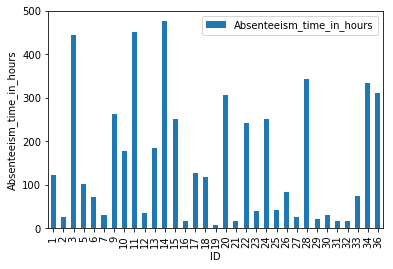

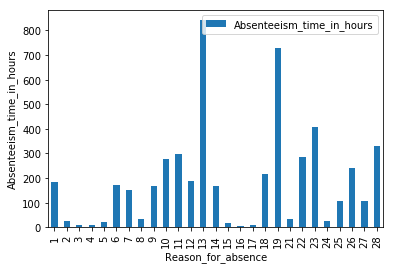

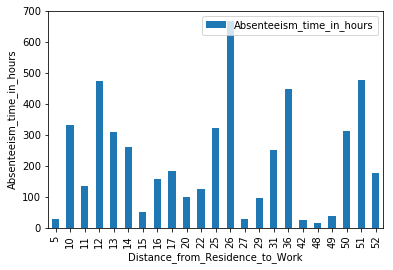

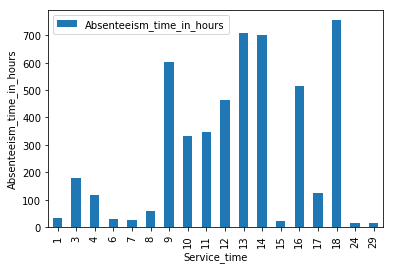

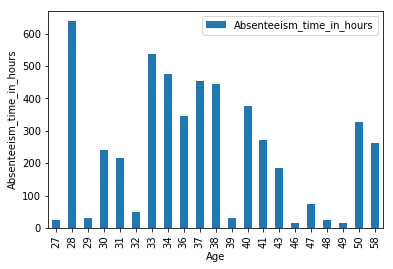

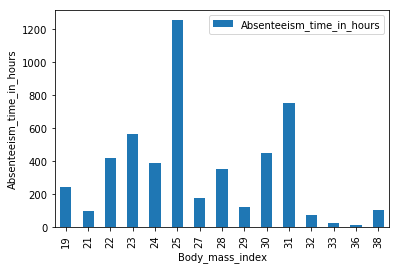

In [254]:
#plotting 

list1 = ['ID', 'Reason_for_absence', 'Distance_from_Residence_to_Work', 'Service_time','Age', 'Body_mass_index']


for i in list1:
    test = abs_reason.groupby(i).agg({'Absenteeism_time_in_hours': 'sum'}).plot(kind = 'bar')
    test.set_xlabel(i)
    test.set_ylabel('Absenteeism_time_in_hours')   

In [258]:
ID_son = abs_reason[['ID','Son']].drop_duplicates().sort_values(['ID'])
test=pd.concat([ID_son,ID_pet], axis = 1)

test


,ID,Son,ID,Pet
9,1,1,1,1
31,2,1,2,5
2,3,0,3,0
43,5,1,5,0
18,6,2,6,2
3,7,2,7,0
255,9,2,9,1
6,10,1,10,4
0,11,2,11,1
564,12,1,12,8


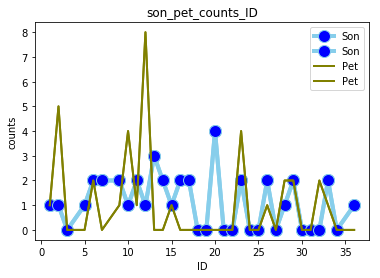

In [259]:

plt.plot( 'ID', 'Son', data=test, marker='o', markerfacecolor='blue', markersize=12, color='skyblue',linewidth = 4)
plt.plot( 'ID', 'Pet', data=test, marker='', color='olive',linewidth = 2)
plt.legend()
plt.xlabel('ID')
plt.ylabel('counts')
plt.title('son_pet_counts_ID')

In [260]:
abs_reason.groupby(['ID']).agg({'Distance_from_Residence_to_Work': 'sum'}).sort_values('Distance_from_Residence_to_Work', ascending = False)

,Distance_from_Residence_to_Work
ID,
3,4896
20,1950
28,1898
11,1368
10,1196
22,1066
15,1054
24,675
33,575



Employees who were absent for maximum number of hours and reasons for absence

There are 7 employees whose absenteeism is > 300 hours (3,11,14,20,28,34,36)

From the above numbers 
ID = 28 was absent for total 343 hours for medical consultation 31 times
ID = 3  was absent for total 444 hours for dental consultation 25 times and physiotherapy 24 times
                            for medical consultation 11 times
                            for Diseases of the musculoskeletal system and connective tissue 10 times
                            For Diseases of the digestive system 7 times etc other reasons
                            
ID = 3 distance from office to work is 51KMS and he is 18 years in the company 
ID = 14 was absent for total 476 hours for Medical Consultation, dental consultation and other 8 more reasons
ID = 11 was absent fot total 450 hours for Various medical reasons commonly patient follow up, medical consultation and other 7 more reasons 

The absenteeism in these employees is very high they should be controlled stricktly through some disciplinary action

Most common Reasons are 28,23,19,13 - Medical consultation, Dental consultation,Injury, poisoning and certain other consequences of external causes,Diseases of the musculoskeletal system and connective tissue 

We should probably reduce number of hours for these reasons exceeding the employee needs to submit legal/medical proofs 

We cant come to a conclusion that higly experience people are taking leaves.

From the above numbers (ID to distravelled) we can conclude that those who travells long distance
from the office to work are the frequent absentees eg, 3, 11, 28

These are not completely depending on other variables like son,pet,service etc.

Those who are 28 years old are having highest number of absenteeism these employees canbe the recentlly married employees with young kids or most number of pets.

Absenteeism is high in employees whose service time is between 9-18 year old

Employees who received disciplinary failure are the most serviced employees (avg of 12.5 years) with avg Hit target of 92% whose work load is high compared to people who didnt receive the disciplinary failure

